# Setup

In [1]:
import torch
import torchvision #collection of datasets connected to visiontasks
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
# download the data
train = datasets.MNIST("Data/", #where the data should be saved
                       train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("Data", #where the data should be saved
                       train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
# define train and testset
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset  = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

# Build the Model

In [4]:
class Net(nn.Module):
    #build the model
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    #define how the data goes through the layers    
    def forward(self, x):
        net.train() #set model in train mode
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
# access the data
for data in trainset:
    print(data) #print 1 batch
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
X, y = data[0][0], data[1][0]

In [7]:
# define some random data
X_r = torch.rand([28, 28])
X_r

tensor([[2.8526e-01, 7.6525e-01, 7.8407e-01, 7.2664e-01, 8.3212e-02, 2.7095e-01,
         9.2851e-01, 2.8985e-01, 6.1082e-01, 5.0362e-01, 3.6588e-01, 5.5066e-01,
         8.1170e-01, 8.6748e-01, 9.2109e-01, 8.7550e-01, 6.1876e-01, 9.9679e-01,
         9.2661e-02, 9.6677e-01, 8.7147e-02, 9.8003e-01, 5.0975e-01, 4.3203e-01,
         2.0241e-01, 1.9908e-01, 6.4430e-01, 1.6923e-01],
        [7.5950e-01, 6.8897e-02, 2.1836e-02, 1.9324e-01, 4.5902e-01, 5.3658e-01,
         1.7522e-02, 3.5621e-01, 3.8213e-04, 6.9458e-01, 3.6396e-01, 9.4305e-02,
         7.7132e-01, 4.3581e-01, 7.5477e-01, 1.2753e-01, 9.6899e-01, 4.3463e-01,
         9.2262e-01, 7.4896e-01, 7.5678e-02, 9.1095e-01, 1.0487e-01, 5.9205e-01,
         9.4376e-01, 9.0935e-01, 6.2317e-01, 6.2413e-02],
        [7.4472e-01, 4.0416e-01, 2.8917e-01, 8.6405e-01, 5.6232e-01, 6.2617e-01,
         7.1003e-01, 4.8734e-01, 1.5631e-01, 5.6264e-01, 2.8577e-01, 3.8455e-01,
         9.5689e-01, 2.1893e-01, 2.1139e-01, 9.8932e-01, 3.9691e-01, 4.057

In [8]:
# pass the first image through the data
output = net(X.view(-1,28*28))
output

tensor([[-2.2600, -2.4476, -2.3856, -2.2222, -2.2660, -2.2054, -2.3134, -2.2695,
         -2.4651, -2.2300]], grad_fn=<LogSoftmaxBackward>)

In [9]:
# pass the random data through the data
output = net(X_r.view(-1,28*28))
output

tensor([[-2.2440, -2.4660, -2.4009, -2.2303, -2.2747, -2.2120, -2.3093, -2.2597,
         -2.4443, -2.2247]], grad_fn=<LogSoftmaxBackward>)

In [10]:
# define an optimizer
optimizer = optim.Adam(net.parameters(), lr=.001)

EPOCHS = 3 #3 passes through the entire dataset

for epoch in range(EPOCHS):
    for data in trainset: #data is a batch of features and labels 
        X, y = data
        net.zero_grad() #before calculating loss, if not set to 0, gradients for different batches are added
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step() #adjusts the weights
    print(loss)

tensor(0.0316, grad_fn=<NllLossBackward>)
tensor(0.0357, grad_fn=<NllLossBackward>)
tensor(0.0146, grad_fn=<NllLossBackward>)


In [11]:
# evaluation (on trainset)
correct = 0
total   = 0

with torch.no_grad(): #gradients are not calculated
    net.eval() #set model in eavaluation mode (i.e. ignoring dropouts and batchnorm)
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))    

Accuracy:  0.978


In [12]:
# evaluation (on testset)
correct = 0
total   = 0

with torch.no_grad(): #gradients are not calculated
    net.eval() #set model in eavaluation mode (i.e. ignoring dropouts and batchnorm)
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))    

Accuracy:  0.968


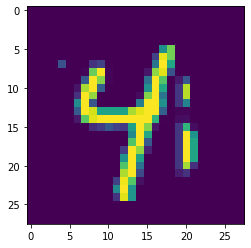

In [13]:
plt.imshow(X[0].view(28, 28));

In [14]:
torch.argmax(net(X[0].view(-1,28*28)))

tensor(4)